<p align="center">
  <img src="https://i.ytimg.com/vi/Wm8ftqDZUVk/maxresdefault.jpg" alt="FIUBA" width="33%"/>
  </p>
  
# **Trabajo Práctico 1: Reservas de Hotel**
### **Checkpoint**: 1
### **Grupo**: 11 - Los Pandas
### **Cuatrimestre**: 2ºC 2023
### **Corrector**: Mateo
### **Integrantes**:
### 103456 - Labollita, Francisco
### 102312 - Mundani Vegega, Ezequiel
###  97263 - Otegui, Matías Iñaki

# Introducción

En el siguiente trabajo práctico, se propone abordar un problema real de ciencia de datos, investigar cada una de las etapas del proceso y resolverlo aplicando los contenidos desarrollados en clase.  
También, a partir de un conjunto de datos de reservas de hotel, proveídos por la cátedra, aplicar técnicas de análisis exploratorio, preprocesamiento de datos y entrenar un modelo de clasificación con el objetivo de predecir si una reserva será o no cancelada.

# Análisis Exploratorio y Preprocesamiento de Datos

## Exploración Inicial

### Carga inicial de dependencias y datos

En primer lugar, se cargan las dependencias a utilizar

In [84]:
import numpy as np
from scipy import stats
import pandas as pd
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

y se cargan los datos de reserva de hoteles en el siguiente dataframe:

In [6]:
hotels_train_url = 'hotels_train.csv'
hotels_df = pd.read_csv(hotels_train_url)

A continuación, se presentan las primeras 5 filas listadas con todas las respectivas columnas para tener una idea general de como se ven los datos para comenzar a analizarlos:

In [7]:
hotels_df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


Hay un total de 31 columnas. De todos estos parámetros, se tendrán en cuenta aquellos que sirvan, en nuestro criterio, sean de utilidad para entrenar el modelo predictivo.  
Se propone analizar cada parámetro individualmente y, al finalizar, presentar un pequeño resumen con las conclusiones de este análisis inicial.

### Parámetros

#### hotel

El parámetro es un _string_ que indica el nombre del Hotel. En un principio, podría pensarse que resulta irrelevante para el entrenamiento del modelo propuesto en sí y respecto a su relación con el target, pero lo mejor es investigar un poco más. Podría llegar a suceder que un hotel tenga más cancelaciones que otro/s, y esto es un motivo a tener en cuenta. Sin embargo, si tuviese las reservas de un solo hotel, no sería necesario tenerlo en cuenta, puesto que solo trataría parámetros de ese hotel y sería un modelo predictivo para dicho hotel unicamente.

Se propone verificar la cantidad de valores únicos que aparecen en dicha columna:

In [19]:
# Valores únicos en la columna 'hotel'
hotel_unique = hotels_df['hotel'].unique()

# Cantidad de valores únicos en la columna 'hotel'
hotel_unique_cant = len(hotel_unique)

print("La cantidad de hoteles cargados en el .CSV es de: ", hotel_unique_cant)
print()
print("Estos hoteles son: ", hotel_unique)

La cantidad de hoteles cargados en el .CSV es de:  2

Estos hoteles son:  ['City Hotel' 'Resort Hotel']


Entonces, se sabe que los datos obtenidos pertenecen a dos hoteles de nombres: "City Hotel" y "Resort Hotel".

Por otro lado, el parámetro es una **Variable Independiente Cualitativa de tipo Texto y es Nominal** ya que es una etiqueta (nombre del hotel) con valores no relacionados entre sí. Es, simplemente, una forma de identificar el establecimiento.  
Se propone obtener la cantidad de veces que aparecen ambos hoteles en las celdas y su frecuencia:

In [82]:
# Cantidad de veces que aparecen los valores
hotel_counts = hotels_df['hotel'].value_counts()

# Porcentaje de veces que aparecen los valores
hotel_percentage = hotels_df['hotel'].value_counts(normalize=True)

print("La cantidad de veces que aparecen los hoteles son: ")
print(hotel_counts)
print()
print("Los porcentajes de aparición del nombre de los hoteles con respecto al total son: ")
print(hotel_percentage)

La cantidad de veces que aparecen los hoteles son: 
hotel
City Hotel      42129
Resort Hotel    19784
Name: count, dtype: int64

Los porcentajes de aparición del nombre de los hoteles con respecto al total son: 
hotel
City Hotel      0.680455
Resort Hotel    0.319545
Name: proportion, dtype: float64


Se puede observar que la mayoría de los registros provienen del _City Hotel_, siendo un poco menos del 70% del total.

Se presentan, a modo de visualización, dos **gráficos** con la cantidad de veces que aparece cada nombre:

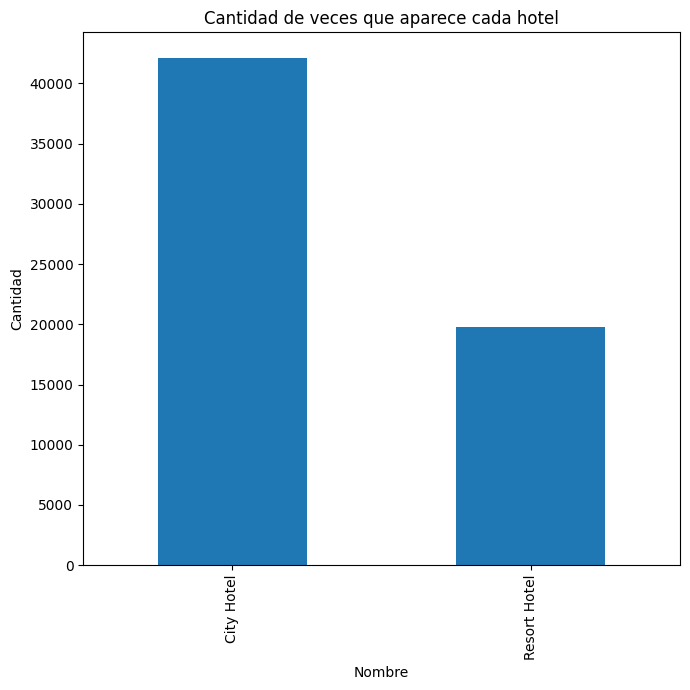

In [81]:
plt.figure(figsize=(7, 7))
hotel_counts.plot(kind='bar')
plt.xlabel('Nombre')
plt.ylabel('Cantidad')
plt.title('Cantidad de veces que aparece cada hotel')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

En forma de gráfico de torta:

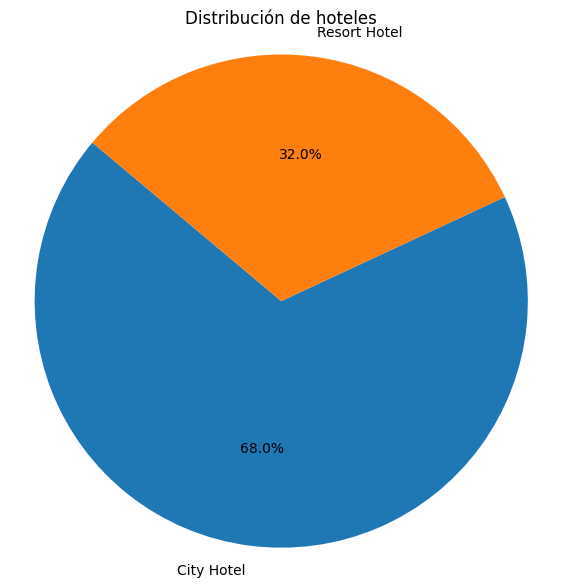

In [80]:
plt.figure(figsize=(7, 7))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de hoteles')
plt.show()

Finalmente, se propone analizar la cantidad de cancelaciones según hotel:

In [64]:

city_hotel_df = hotels_df[hotels_df['hotel'] == "City Hotel"]
city_hotel_cancelations = city_hotel_df[city_hotel_df['is_canceled'] == 1]
city_hotel_cancelations_percentage = len(city_hotel_cancelations) / len(city_hotel_df)

resort_hotel_df = hotels_df[hotels_df['hotel'] == "Resort Hotel"]
resort_hotel_cancelations = resort_hotel_df[resort_hotel_df['is_canceled'] == 1]
resort_hotel_cancelations_percentage = len(resort_hotel_cancelations) / len(resort_hotel_df)

print("La cantidad de cancelaciones para el City Hotel es de: ", city_hotel_cancelations_percentage)
print()
print("La cantidad de cancelaciones para el Resort Hotel es de: ", resort_hotel_cancelations_percentage)

La cantidad de cancelaciones para el City Hotel es de:  0.5486007263405255

La cantidad de cancelaciones para el Resort Hotel es de:  0.3957238172260412


Se propone mostrar los resultados en dos gráficos de torta, uno por cada hotel:

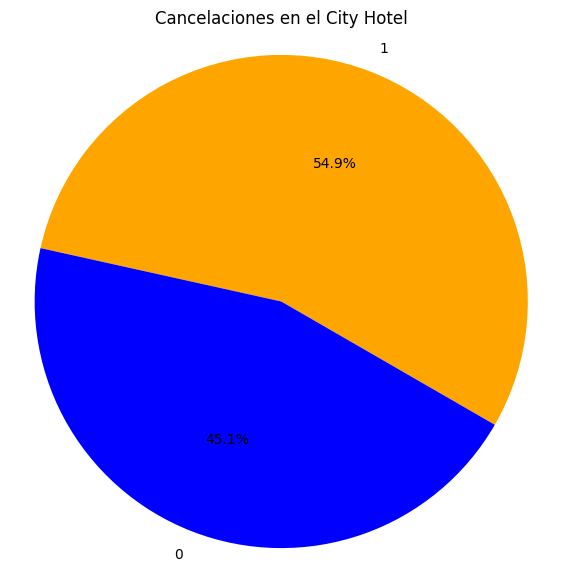

In [79]:
city_hotel_target_counts = city_hotel_df['is_canceled'].value_counts()

colores = ['orange', 'blue']

plt.figure(figsize=(7, 7))
plt.pie(city_hotel_target_counts, labels=city_hotel_target_counts.index, autopct='%1.1f%%', startangle=-30, colors=colores)
plt.axis('equal')
plt.title('Cancelaciones en el City Hotel')
plt.show()

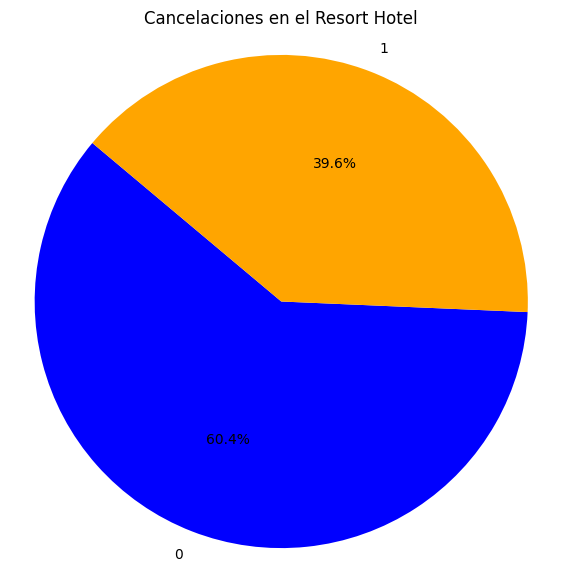

In [78]:
resort_hotel_target_counts = resort_hotel_df['is_canceled'].value_counts()

colores = ['blue', 'orange']

plt.figure(figsize=(7, 7))
plt.pie(resort_hotel_target_counts, labels=resort_hotel_target_counts.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.axis('equal')
plt.title('Cancelaciones en el Resort Hotel')
plt.show()

De esta manera, se puede observar que es más probable, un 15% más probable, que una reserva sea cancelada si proviene del _City Hotel_ que si lo hace del _Resort Hotel_. Por lo tanto, el parámetro _hotel_ es **relevante** y está relacionado con el **target**.  
No se pueden explicar las razones en principio, pero si se puede afirmar que es un parámetro relevante para el entrenamiento del modelo predictivo.

#### lead_time

El parámetro indica el número de días que transcurrieron entre la fecha de entrada de la reserva en el PMS y la fecha de ingreso del cliente al hotel. En principio, podría pensarse que aporta información relevante con respecto al target, pero es necesario investigar más.

El parámetro es un _integer_ de tipo **Variable Independiente Cuantitativa Discreta**, ya que es una medida discreta del tiempo y no se toman otros intervalos de tiempo. Se propone calcular la Media, la Mediana, la Varianza, la Desviación Estándar, la Moda, la Covarianza con respecto al Target y la Correlación de Pearson con respecto al Target.

In [93]:
lead_time_column = hotels_df['lead_time'].tolist()
target_column = hotels_df['is_canceled'].tolist()

lead_time_media = np.mean(lead_time_column)
lead_time_mediana = np.median(lead_time_column)
lead_time_varianza = np.var(lead_time_column)
lead_time_desviacion_estandar = np.std(lead_time_column)
lead_time_moda = stats.mode(lead_time_column).mode
lead_time_covarianza = np.cov(lead_time_column, target_column)[0, 1]
lead_time_pearson = np.corrcoef(lead_time_column, target_column)[0, 1]

print("Media: ", lead_time_media)
print("Mediana: ", lead_time_mediana)
print("Varianza: ", lead_time_varianza)
print("Desviación Estandar: ", lead_time_desviacion_estandar)
print("Moda: ", lead_time_moda)
print("Covarianza (con respecto a Target): ", lead_time_covarianza)
print("Correlación de Pearson (con respecto a Target): ", lead_time_pearson)

Media:  112.24818697204141
Mediana:  78.0
Varianza:  12258.267122558873
Desviación Estandar:  110.71705885977497
Moda:  0
Covarianza (con respecto a Target):  16.265487254459007
Correlación de Pearson (con respecto a Target):  0.2938160884261427


La **Media** indica el valor promedio obtenido, que teniendo en cuenta lo desarrollado anteriormente, puede aproximarse a 112 días.

La **Mediana** indica el valor que se encuentra en el centro de un conjunto de datos al estar ordenados en orden ascendente o descendente. En este caso, el valor obtenido es de 78 días, pero para decidir cual utilizar en caso de una corrección (si la Media o la Mediana), lo mejor es visualizar los datos en un gráfico y observar su distribución.

La **Varianza** indica cuán dispersos o agrupados están los valores en relación con la media (promedio) de los datos. En este caso, el valor es muy grande, demasiado para lo esperable, lo que llevaría a pensar que es posible que haya valores atípicos o que necesiten corrección. 

La **Desviación Estandar** se utiliza para cuantificar la dispersión o la variabilidad de un conjunto de datos. En este caso, el valor es muy grande, más de lo esperable, lo que llevaría a pensar que es posible que haya valores atípicos o que necesiten corrección.

La **Moda** representa el valor, o los valores, más frecuentes en el conjunto de datos. En este caso, el 0 podría indicar que la reserva se hizo el mismo día de llegada (osea no hubo reserva), o bien que no se tienen datos concretos para esa fila. Se debe realizar una investigación más profunda.

La **Covarianza** es positiva, significa que cuando una variable aumenta, la otra tiende a aumentar también. Si fuera negativa, sería el caso contrario y su fuese cero (o cercana a cero) no tendrian relación entre sí. Dado que la covarianza puede ser afectada por valores atípicos en los datos, esto puede hacer que sea difícil de interpretar. Por lo que se propone, analizar también la Correlación de Pearson.  

En el caso de la **Correlación de Pearson**, dado que es positiva, esto podría indicar que a medida que el tiempo entre la reserva y la fecha de llegada aumenta, la probabilidad de cancelación tiende a aumentar, lo que podría sugerir una relación positiva. Si fuese negativa esto indicaría una relación inversa y si fuese 0 no se observaría una relación lineal fuerte entre estas dos variables.
Dado que su relación, es más cercana a 0 que 1, pero positiva, se puede concluir que su relación no es completamente fuerte, pero se espera una mayor cancelación de la reserva a medida que pasa el tiempo.

Se propone continuar investigando mediante un gráfico de barras en el tiempo:

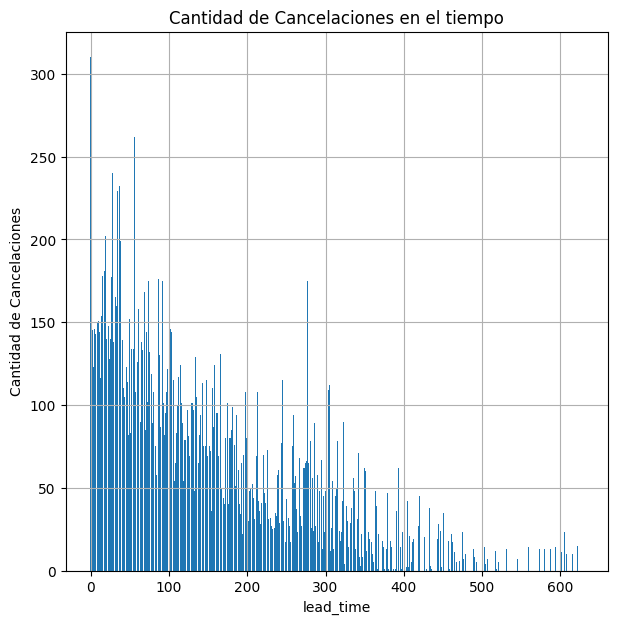

In [99]:
# Filtrar el DataFrame para obtener solo las filas donde 'is_canceled' es igual a 1
hotels_cancelations = hotels_df[hotels_df['is_canceled'] == 1]

# Contar la cantidad de cancelaciones por valor de 'lead_time'
hotels_cancelations_per_lead_time = hotels_cancelations['lead_time'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(7, 7))
plt.bar(hotels_cancelations_per_lead_time.index, hotels_cancelations_per_lead_time.values)
plt.xlabel('lead_time')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Cantidad de Cancelaciones en el tiempo')
plt.grid(True)
plt.show()

## Visualización de los Datos

## Datos Faltantes

## Valores Atípicos

# Clasificación - Entrenamiento y Predicción